In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams['axes.unicode_minus'] =False
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import (
    mean_absolute_error, mean_squared_error, median_absolute_error,
    r2_score, explained_variance_score
)

In [8]:
df = pd.read_csv("../eda/data/merged_data.csv")

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39975 entries, 0 to 39974
Columns: 137 entries, 기준_년분기_코드 to 여성연령대_60_이상_직장_인구_수
dtypes: float64(132), int64(2), object(3)
memory usage: 41.8+ MB


In [10]:
df.describe()

,기준_년분기_코드,점포_수,유사_업종_점포_수,개업_률,개업_점포_수,폐업_률,폐업_점포_수,프랜차이즈_점포_수,당월_매출_금액,당월_매출_건수,...,남성연령대_30_직장_인구_수,남성연령대_40_직장_인구_수,남성연령대_50_직장_인구_수,남성연령대_60_이상_직장_인구_수,여성연령대_10_직장_인구_수,여성연령대_20_직장_인구_수,여성연령대_30_직장_인구_수,여성연령대_40_직장_인구_수,여성연령대_50_직장_인구_수,여성연령대_60_이상_직장_인구_수
count,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,3.997500e+04,3.997500e+04,...,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000,39975.000000
mean,20220.096635,320.453959,353.995822,2.971897,11.176735,2.589829,9.794196,33.541864,1.553588e+10,5.749521e+05,...,27142.451857,26395.847330,19736.054484,9543.760350,223.790644,15057.239225,17365.139937,13473.701138,10014.440951,4391.736785
std,18.764856,624.817403,648.030094,2.385172,21.887316,2.001541,19.292389,71.256850,4.679056e+10,1.482439e+06,...,39941.977062,36960.317249,24219.922727,9600.950081,399.065330,22371.870231,24534.250632,16564.421275,11715.352615,4832.596737
min,20191.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.135000e+03,2.000000e+00,...,1169.000000,1978.000000,2704.000000,2245.000000,0.000000,635.000000,1180.000000,1674.000000,1663.000000,257.000000
25%,20203.000000,94.000000,105.000000,1.300000,2.000000,1.200000,2.000000,0.000000,1.197476e+09,1.463000e+04,...,5590.000000,5799.000000,5397.000000,3928.000000,0.000000,3138.000000,3795.000000,4042.000000,3856.000000,1695.000000
50%,20221.000000,161.000000,188.000000,2.600000,5.000000,2.300000,4.000000,4.000000,4.114511e+09,7.159500e+04,...,9123.000000,10094.000000,10122.000000,5924.000000,39.000000,5068.000000,6673.000000,6807.000000,5695.000000,2678.000000
75%,20234.000000,313.000000,357.000000,4.200000,12.000000,3.600000,10.000000,27.000000,1.251953e+10,3.641125e+05,...,24849.000000,24451.000000,18373.000000,10207.000000,209.000000,21296.000000,21114.000000,14062.000000,8866.000000,4775.000000
max,20252.000000,17827.000000,17845.000000,43.600000,773.000000,33.300000,554.000000,688.000000,1.399137e+12,2.716973e+07,...,204697.000000,188865.000000,116356.000000,51339.000000,1679.000000,114671.000000,124729.000000,86333.000000,63848.000000,26816.000000


In [11]:
num_df = df.select_dtypes(include=['int64', 'float64'])

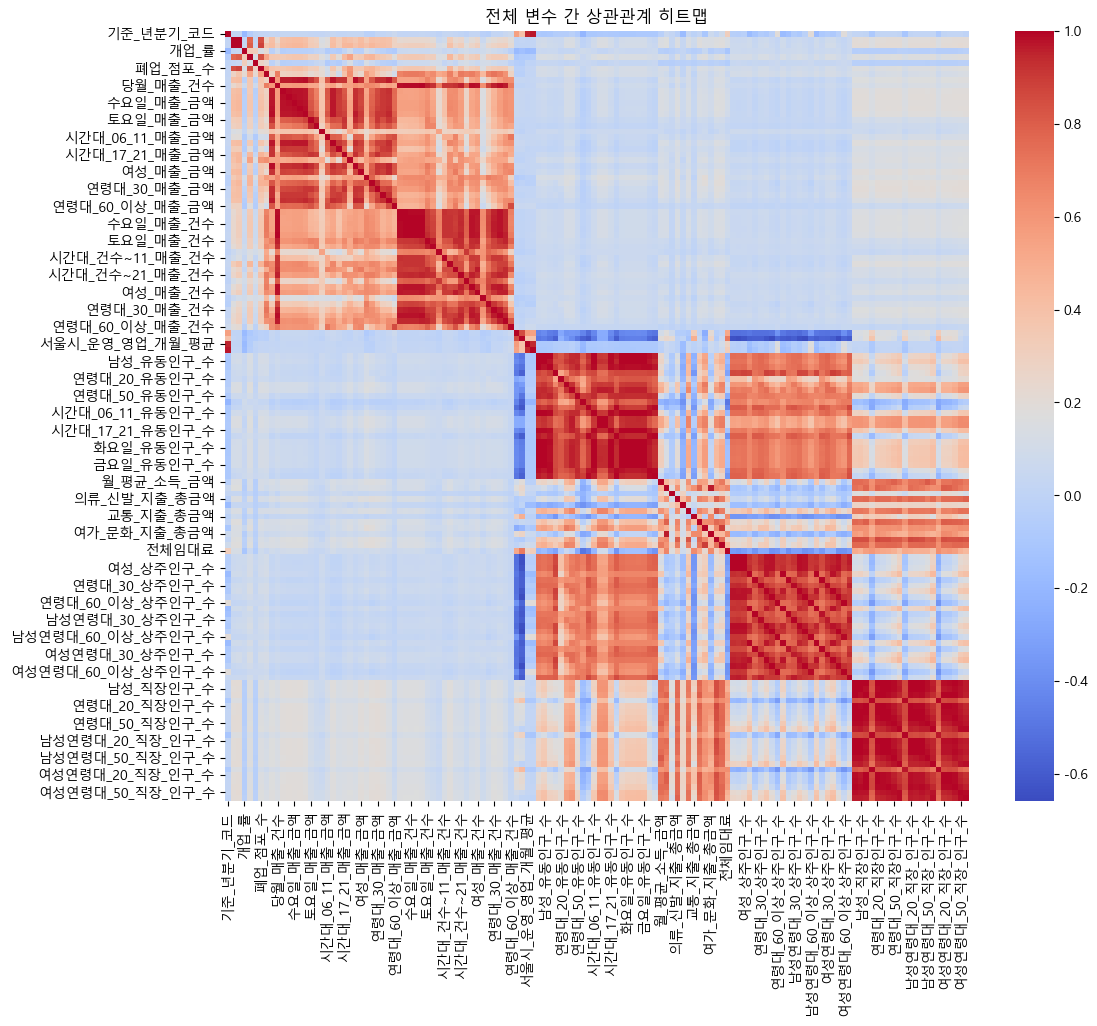

In [ ]:
# 일단 러프하게
plt.figure(figsize=(12, 10))
corr = num_df.corr()
sns.heatmap(corr, cmap="coolwarm", annot=False)
plt.title("전체 변수 간 상관관계 히트맵")
plt.show()

C:\Users\이상민\AppData\Local\Temp\ipykernel_20512\2306271718.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target[1:8], y=corr_target[1:8].index, palette="viridis")


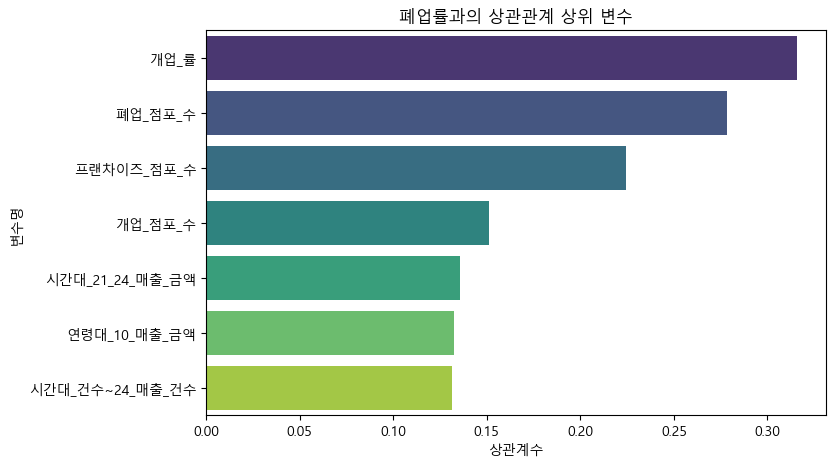

In [20]:
# 타겟 변수 정의 및 상관계수 계산
target_col = "폐업_률"
corr_target = corr[target_col].sort_values(ascending=False)
important_features = corr_target[1:8].index.tolist()  # 상위 7개 피처 선택

plt.figure(figsize=(8, 5))
sns.barplot(x=corr_target[1:8], y=corr_target[1:8].index, palette="viridis")
plt.title("폐업률과의 상관관계 상위 변수")
plt.xlabel("상관계수")
plt.ylabel("변수명")
plt.show()

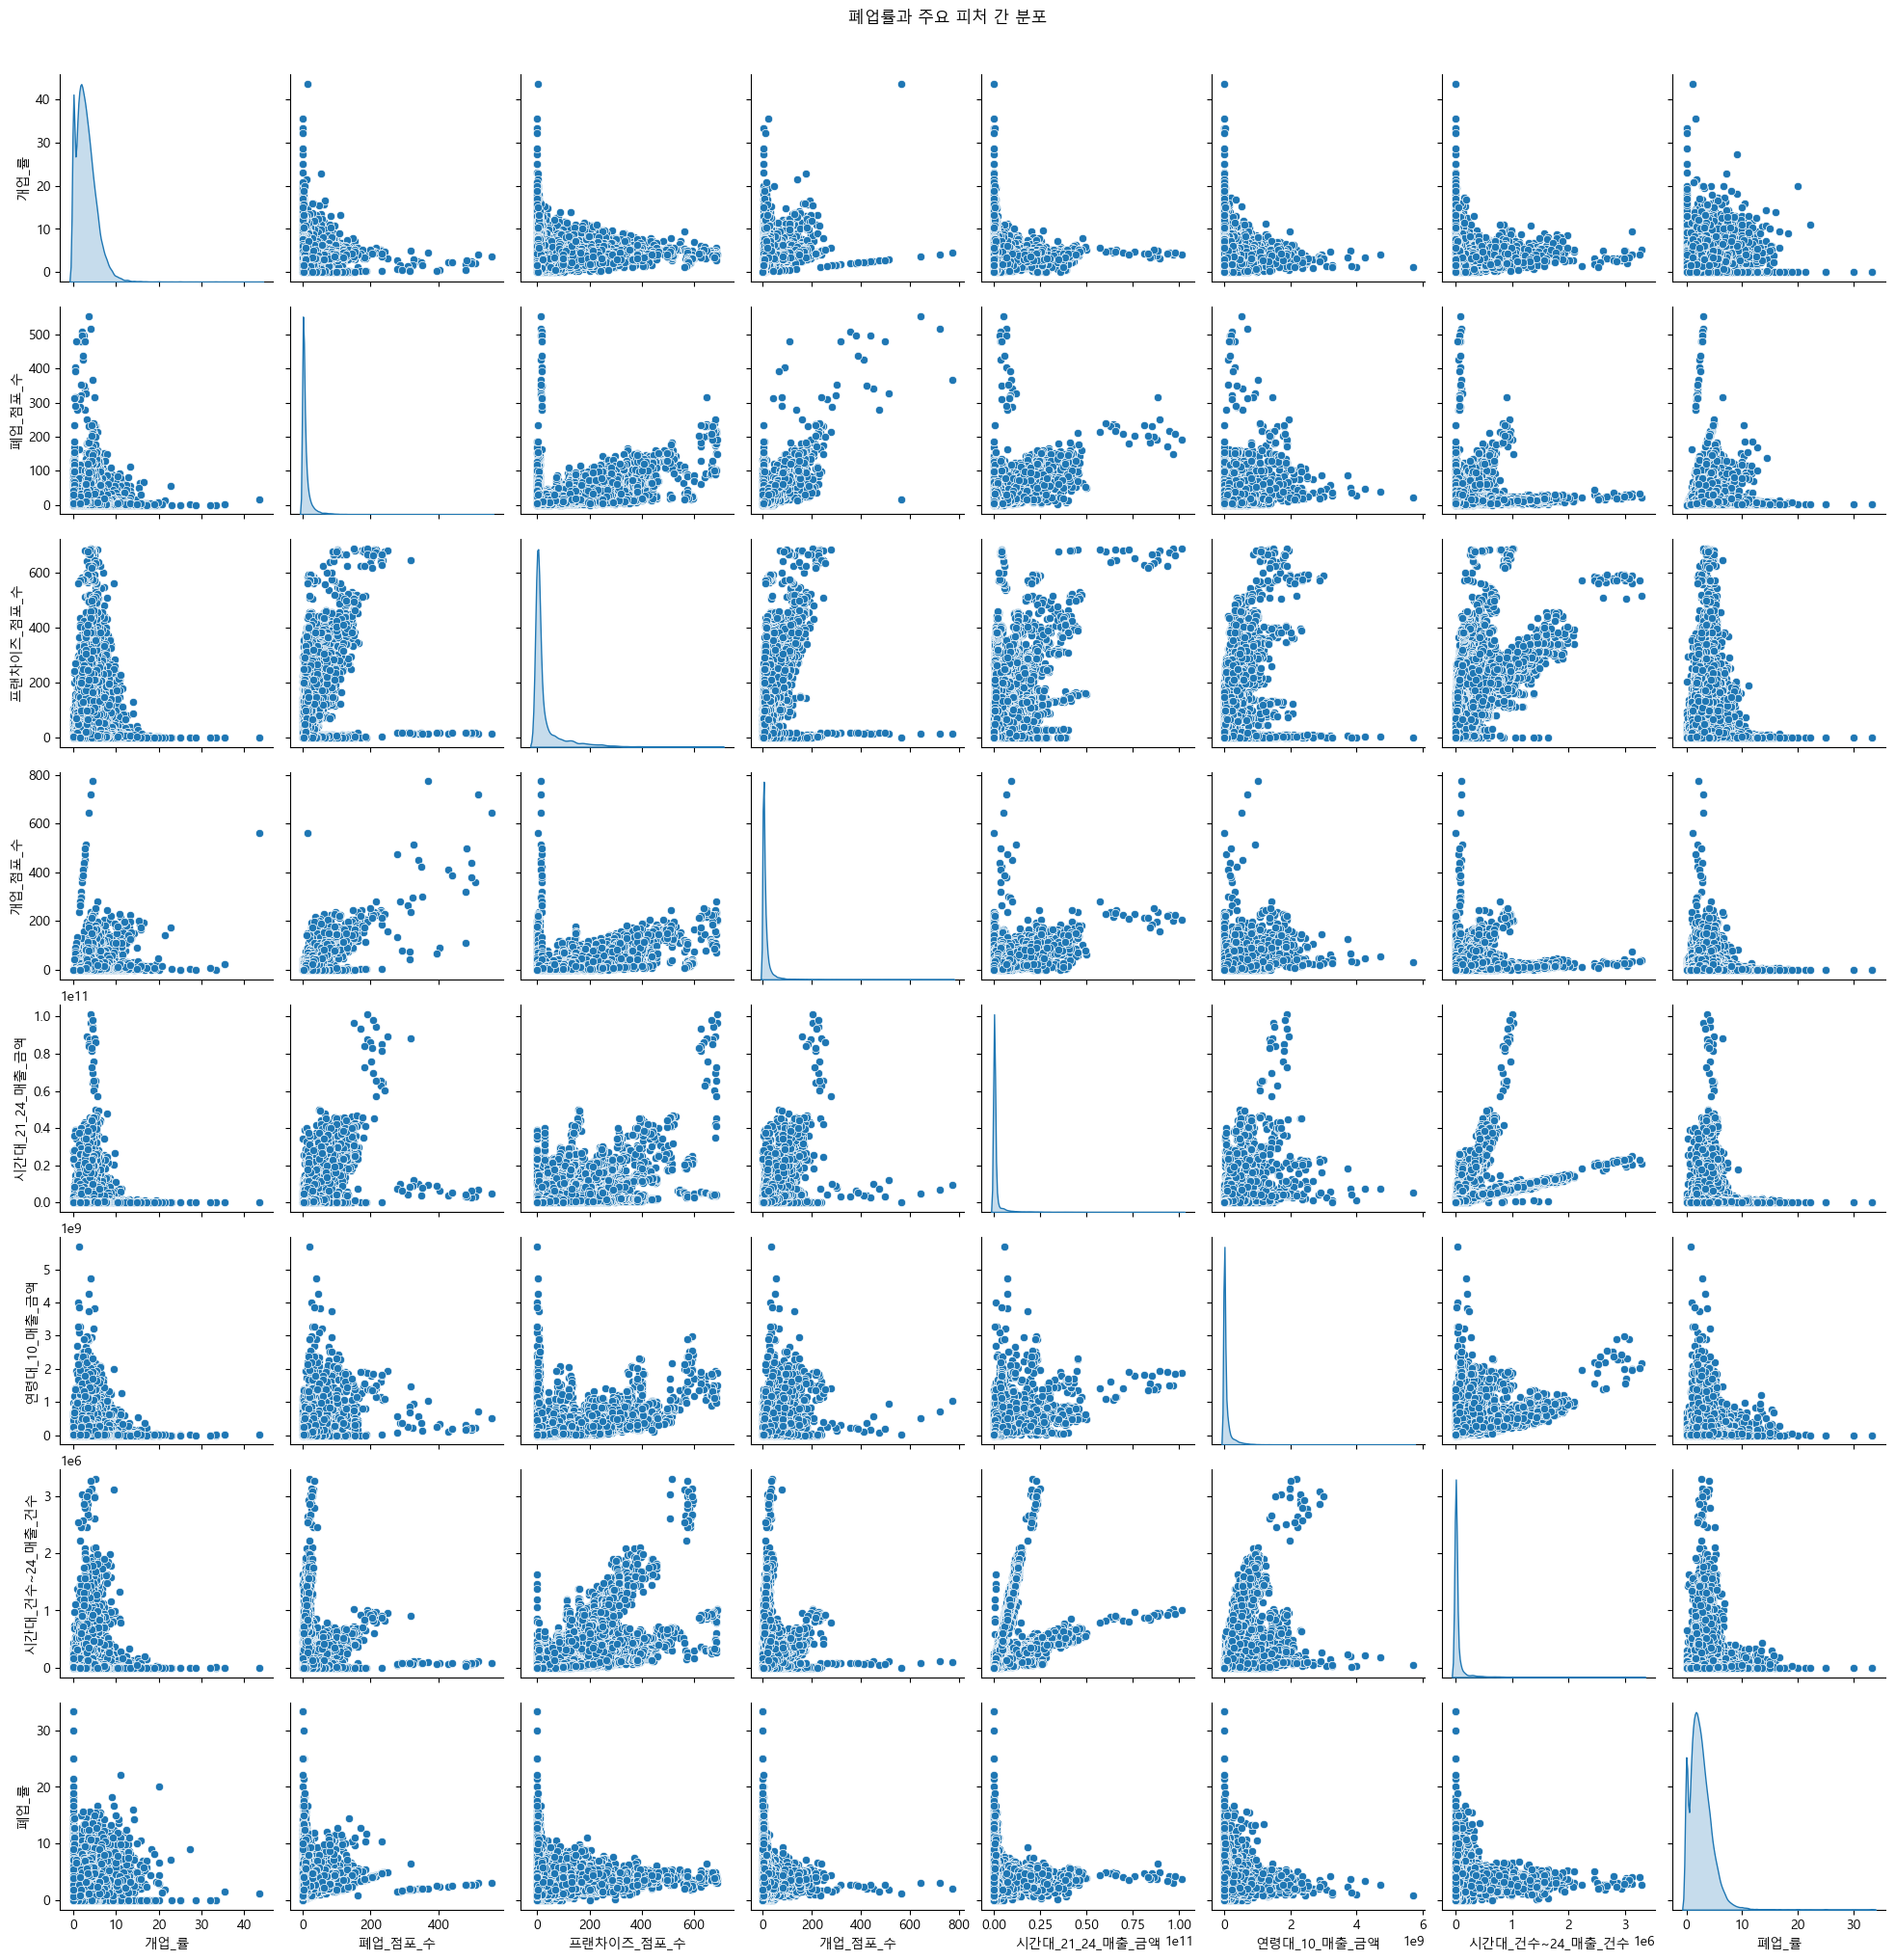

In [ ]:
# 주요 피처만 다시 시각화
sns.pairplot(num_df[important_features + [target_col]], diag_kind="kde")
plt.suptitle("폐업률과 주요 피처 간 분포", y=1.02)
plt.show()

---
RandomForest

In [32]:
X = num_df[important_features]
y = num_df[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(
    n_estimators=600,    # 안정성 위해 여유
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

In [33]:
mae  = mean_absolute_error(y_test, y_pred)
mse  = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2   = r2_score(y_test, y_pred)

print(f"MAE  : {mae:.4f}")
print(f"MSE  : {mse:.4f}")
print(f"RMSE : {rmse:.4f}")
print(f"R²   : {r2:.4f}")


MAE  : 0.2063
MSE  : 0.6464
RMSE : 0.8040
R²   : 0.8443


C:\Users\이상민\AppData\Local\Temp\ipykernel_20512\2807402162.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=importances, y=important_features, palette="coolwarm")


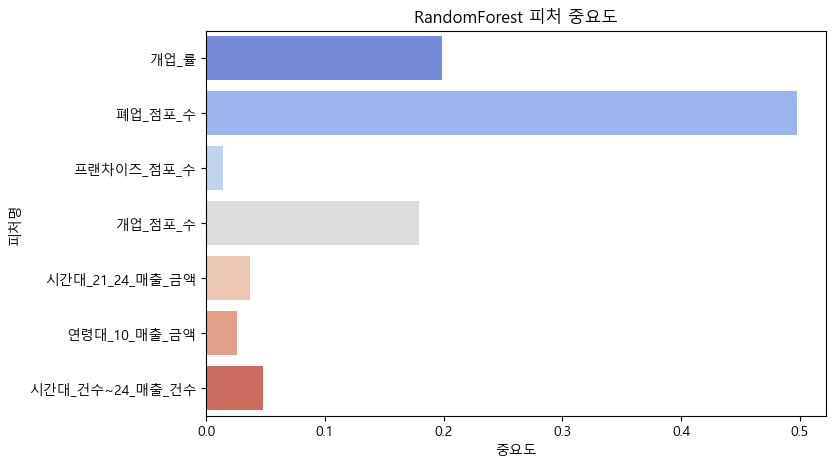

In [27]:
importances = rf.feature_importances_
plt.figure(figsize=(8, 5))
sns.barplot(x=importances, y=important_features, palette="coolwarm")
plt.title("RandomForest 피처 중요도")
plt.xlabel("중요도")
plt.ylabel("피처명")
plt.show()

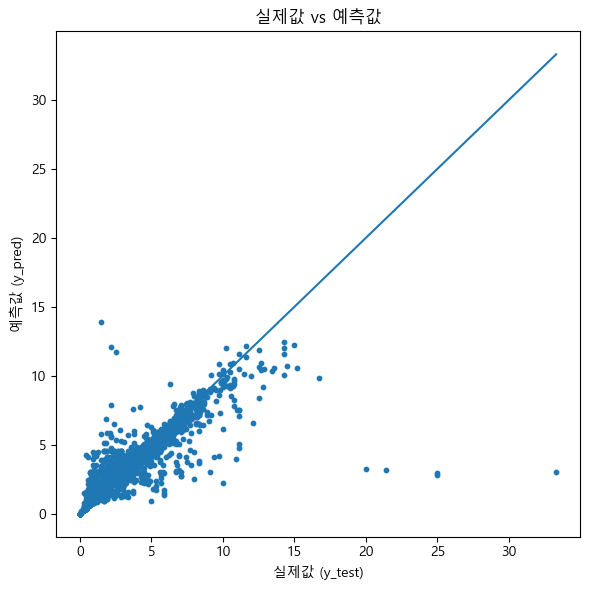

In [34]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, s=10)
vmin = float(np.nanmin([y_test.min(), y_pred.min()]))
vmax = float(np.nanmax([y_test.max(), y_pred.max()]))
plt.plot([vmin, vmax], [vmin, vmax])  # y=x 기준선
plt.xlabel("실제값 (y_test)")
plt.ylabel("예측값 (y_pred)")
plt.title("실제값 vs 예측값")
plt.tight_layout()
plt.show()

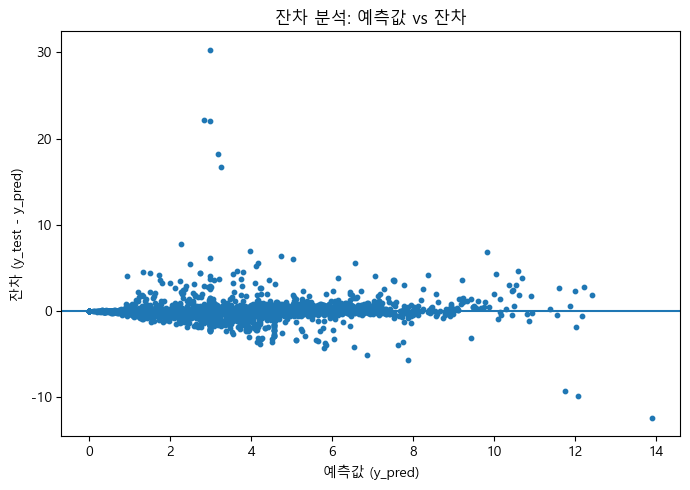

In [35]:
residuals = y_test - y_pred
plt.figure(figsize=(7,5))
plt.scatter(y_pred, residuals, s=10)
plt.axhline(0)
plt.xlabel("예측값 (y_pred)")
plt.ylabel("잔차 (y_test - y_pred)")
plt.title("잔차 분석: 예측값 vs 잔차")
plt.tight_layout()
plt.show()

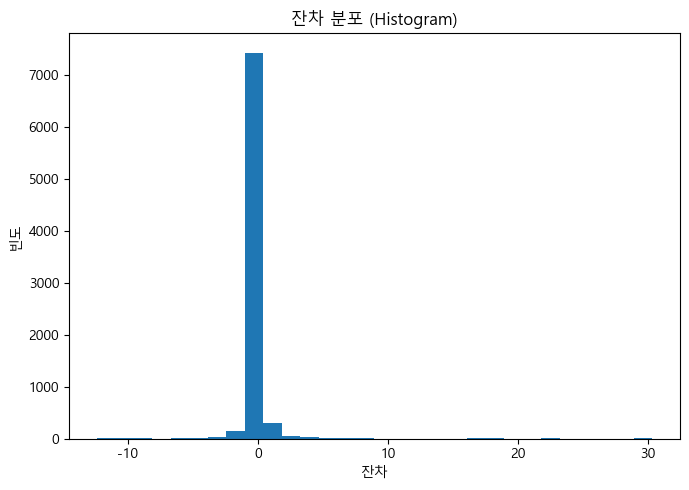

In [36]:
plt.figure(figsize=(7,5))
plt.hist(residuals, bins=30)
plt.xlabel("잔차")
plt.ylabel("빈도")
plt.title("잔차 분포 (Histogram)")
plt.tight_layout()
plt.show()